# Regresión Logística

Regresión logística está dentro de los algoritmos de regresión (y supervisados) y sirve para predecir si un evento ocurrirá o no. A esto lo podemos interpretar como verdadero/falso, sí/no, 1/0. El objetivo es encontrar una curva que mejor separe los datos. Un ejemplo sería la probabilidad de que un alumno apruebe un examen dadas las horas que estudió. Al final, buscamos un aprobó o no aprobó.

![](https://upload.wikimedia.org/wikipedia/commons/6/6d/Exam_pass_logistic_curve.jpeg)

## División de datos

Para nuestro ejemplo usaremos un dataset de pacientes con diabetes. El objetivo será predecir si algún paciente tiene diabetes dadas sus características.

Link de descarga del dataset: https://static.platzi.com/media/public/uploads/diabetes_e5df1a05-5634-44ce-91df-7bc6143aa93e.csv

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [ ]:
diabetes = pd.read_csv('/work/datasets/diabetes.csv')
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
diabetes.shape

(768, 9)

In [ ]:
feature_cols = [
    'Pregnancies',
    'Glucose',
    'BloodPressure',
    'SkinThickness',
    'Insulin',
    'BMI',
    'DiabetesPedigreeFunction',
    'Age'
]

x = diabetes[feature_cols]
y = diabetes['Outcome']

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.25, random_state=0)

In [ ]:
log_reg = LogisticRegression(max_iter=len(X_train))
log_reg.fit(X_train, Y_train)

LogisticRegression(max_iter=576)

Dado que el número máximo de iteraciones por default en `LogisticRegression()` es 100, tenemos que ajustar este valor para que nuestras predicciones sean más precisas. Entonces ponemos `LogisticRegression(max_iter=len(X_train))`

In [ ]:
y_pred = log_reg.predict(X_test)

In [ ]:
y_pred

array([1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0])

## Evaluación del modelo

Para evaluar la precición del modelo podemos usar una matriz de confusión y/o el método `metrics.accuracy_score()` de Scikit-Learn. Empecemos con la matriz de confusión

### Confusion Matrix

Cuando tienes un modelo de clasificación, este clasifica en *verdadero* o *falso*. Sin embargo, algunas clasificaciones serán erradas y por eso las representamos en una matriz de confusión así:

![](https://miro.medium.com/max/712/1*Z54JgbS4DUwWSknhDCvNTQ.png)

Algunas fuentes, como [Wikipedia](https://en.wikipedia.org/wiki/Confusion_matrix), usan la convención de ejes anterior. Sin embargo, Scikit-Learn usa esta:
![](https://miro.medium.com/max/648/1*bTpZwqQ_T9ghf1F1a2Xk2g.png)
![](https://scikit-learn.org/stable/_images/sphx_glr_plot_confusion_matrix_001.png)

Lo que nos lleva a hacer una interpretación de la matriz de la siguiente forma:
![](https://miro.medium.com/max/875/1*VSchph99Wiv6tQpNIvMJbw.png)

Si quieres investigar más, te recomiendo estas lecturas:
* [Confusion Matrix Visualization](https://medium.com/@dtuk81/confusion-matrix-visualization-fc31e3f30fea)

* [Understanding the Confusion Matrix from Scikit learn](https://towardsdatascience.com/understanding-the-confusion-matrix-from-scikit-learn-c51d88929c79)

Ahora hagámoslo con código.

In [ ]:
cnf_matrix = metrics.confusion_matrix(Y_test, y_pred)
cnf_matrix

array([[117,  13],
       [ 26,  36]])

In [ ]:
df_cnf_matrix = pd.DataFrame(cnf_matrix)
df_cnf_matrix

,0,1
0,117,13
1,26,36


<AxesSubplot:title={'center':'Matriz de confusión'}>

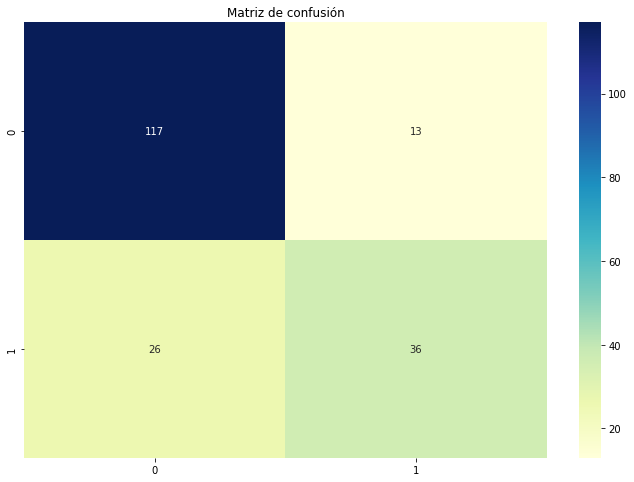

In [ ]:
fig, ax = plt.subplots(figsize=(10, 7))
plt.title('Matriz de confusión')
plt.xlabel('Etiquetas de prediccion')
plt.ylabel('Etiquetas de observación')
plt.tight_layout()
sns.heatmap(df_cnf_matrix, annot=True, fmt='g', cmap="YlGnBu")

Nuestra matriz de confusión nos indica que tenemos:

* 117 verdaderos negativos.
* 36 verdaderos positivos.
* 13 falsos positivos.
* 26 falsos negativos.

Ahora, para cuantificar la precisión de nuestro modelo dividimos la suma de verdaderos positivos y verdaderos negativos sobre el total de los datos. En código lo hacemos así:

In [ ]:
metrics.accuracy_score(Y_test, y_pred)

0.796875

Por lo tanto, nuestro modelo tiene una precisión del 79.7%.

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=041dfe44-1bec-412b-9d74-e111f757f0ed' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>